## IBM Machine Learning Course Lab 6 - Decision Trees

This is my own attempt at Lab 6 of 'Machine Learning with Python' by IBM on Coursera. It includes my own insight when solving problems. The method of analysis presented here is far more rigorous than that required by the course.

In [1]:
""" importing necessary packages """
import numpy as np 
import pandas as pd
from sklearn.tree import DecisionTreeClassifier


In [2]:
""" Importing the data set """

!wget -O drug200.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/drug200.csv    
df = pd.read_csv("drug200.csv")
df.head(10)


--2020-07-26 19:36:49--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/drug200.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6027 (5.9K) [text/csv]
Saving to: ‘drug200.csv’

drug200.csv         100%[===================>]   5.89K  --.-KB/s    in 0s      

2020-07-26 19:36:54 (99.1 MB/s) - ‘drug200.csv’ saved [6027/6027]



,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
5,22,F,NORMAL,HIGH,8.607,drugX
6,49,F,NORMAL,HIGH,16.275,drugY
7,41,M,LOW,HIGH,11.037,drugC
8,60,M,NORMAL,HIGH,15.171,drugY
9,43,M,LOW,NORMAL,19.368,drugY


## Data Exploration and Preparation

In [3]:
df['Drug'].value_counts()
df.shape
df.info

X = df[['Age','Sex','BP','Cholesterol','Na_to_K']]
y = df[['Drug']]

# note that Sex, BP and Cholesterol contain categorical values...
#the sklearn decision tree algorithm is unable to split data based on such values, as such we need to 
#convert this to 'dummy variables'
#for example: male = 0, female = 1, etc etc
#there are two ways to do this, we will use both to see which one is easier / better to work with

X_1 = pd.get_dummies(X) #.values converts df to an array
X_1.head()
#this method adds many extra categories which might make the decision tree unnecessarily complex...
#there's a nicer way to do it (from IBM), see below

,Age,Na_to_K,Sex_F,Sex_M,BP_HIGH,BP_LOW,BP_NORMAL,Cholesterol_HIGH,Cholesterol_NORMAL
0,23,25.355,1,0,1,0,0,1,0
1,47,13.093,0,1,0,1,0,1,0
2,47,10.114,0,1,0,1,0,1,0
3,28,7.798,1,0,0,0,1,1,0
4,61,18.043,1,0,0,1,0,1,0


In [4]:
X_2 = X.values #convert it to an array
print(X_2[0:5])


from sklearn import preprocessing as pp
labels_sex = pp.LabelEncoder() #create lable encoder object
labels_sex.fit(['M','F']) # feed in array of the possible categorical values for sex!

X_2[:,1]=labels_sex.transform(X_2[:,1]) #very smart,don't understand exactly how it works but it essentially 
#replaces F with 0, and M with 1 (based on the order that they appear in the array, NOT IN THE LIST!)

#now we need to do the same for BP and cholesterol..

possible_val = X['BP'].value_counts().index.values #creates list of the possible values!


labels_BP = pp.LabelEncoder()
labels_BP.fit(possible_val)
X_2[:,2]= labels_BP.transform(X_2[:,2])
print(X_2[0:5])

#for cholesterol

possible_val = X['Cholesterol'].value_counts().index.values
labels_chol = pp.LabelEncoder()
labels_chol.fit(possible_val)
X_2[:,3] = labels_chol.transform(X_2[:,3])
print(X_2[0:5])


#Note:

#Sex
#F = 0, M = 1

#BP
#High = 0, Low = 1, med = 2


#Chol
#high = 0, normal = 1



[[23 'F' 'HIGH' 'HIGH' 25.355]
 [47 'M' 'LOW' 'HIGH' 13.093]
 [47 'M' 'LOW' 'HIGH' 10.113999999999999]
 [28 'F' 'NORMAL' 'HIGH' 7.797999999999999]
 [61 'F' 'LOW' 'HIGH' 18.043]]
[[23 0 0 'HIGH' 25.355]
 [47 1 1 'HIGH' 13.093]
 [47 1 1 'HIGH' 10.113999999999999]
 [28 0 2 'HIGH' 7.797999999999999]
 [61 0 1 'HIGH' 18.043]]
[[23 0 0 0 25.355]
 [47 1 1 0 13.093]
 [47 1 1 0 10.113999999999999]
 [28 0 2 0 7.797999999999999]
 [61 0 1 0 18.043]]


In [5]:
from sklearn.model_selection import train_test_split as tts
X_train, X_test, y_train, y_test = tts(X_2,y,test_size = 0.3, random_state = 1)


## Modelling - Decision tree

In [6]:
drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
#attributes that the function can take:
#criterion: entropy OR gini (gini is a low impurity classifier)


drugTree # it shows the default parameters

drugTree.fit(X_train, y_train)
predTree = drugTree.predict(X_test)

print (predTree [0:5])
print (y_test [0:5])

from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, predTree))

['drugX' 'drugY' 'drugX' 'drugC' 'drugY']
      Drug
58   drugX
40   drugY
34   drugX
102  drugC
184  drugY
DecisionTrees's Accuracy:  0.9666666666666667


## Visualization

In [7]:
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 

/Users/yousefnami/opt/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


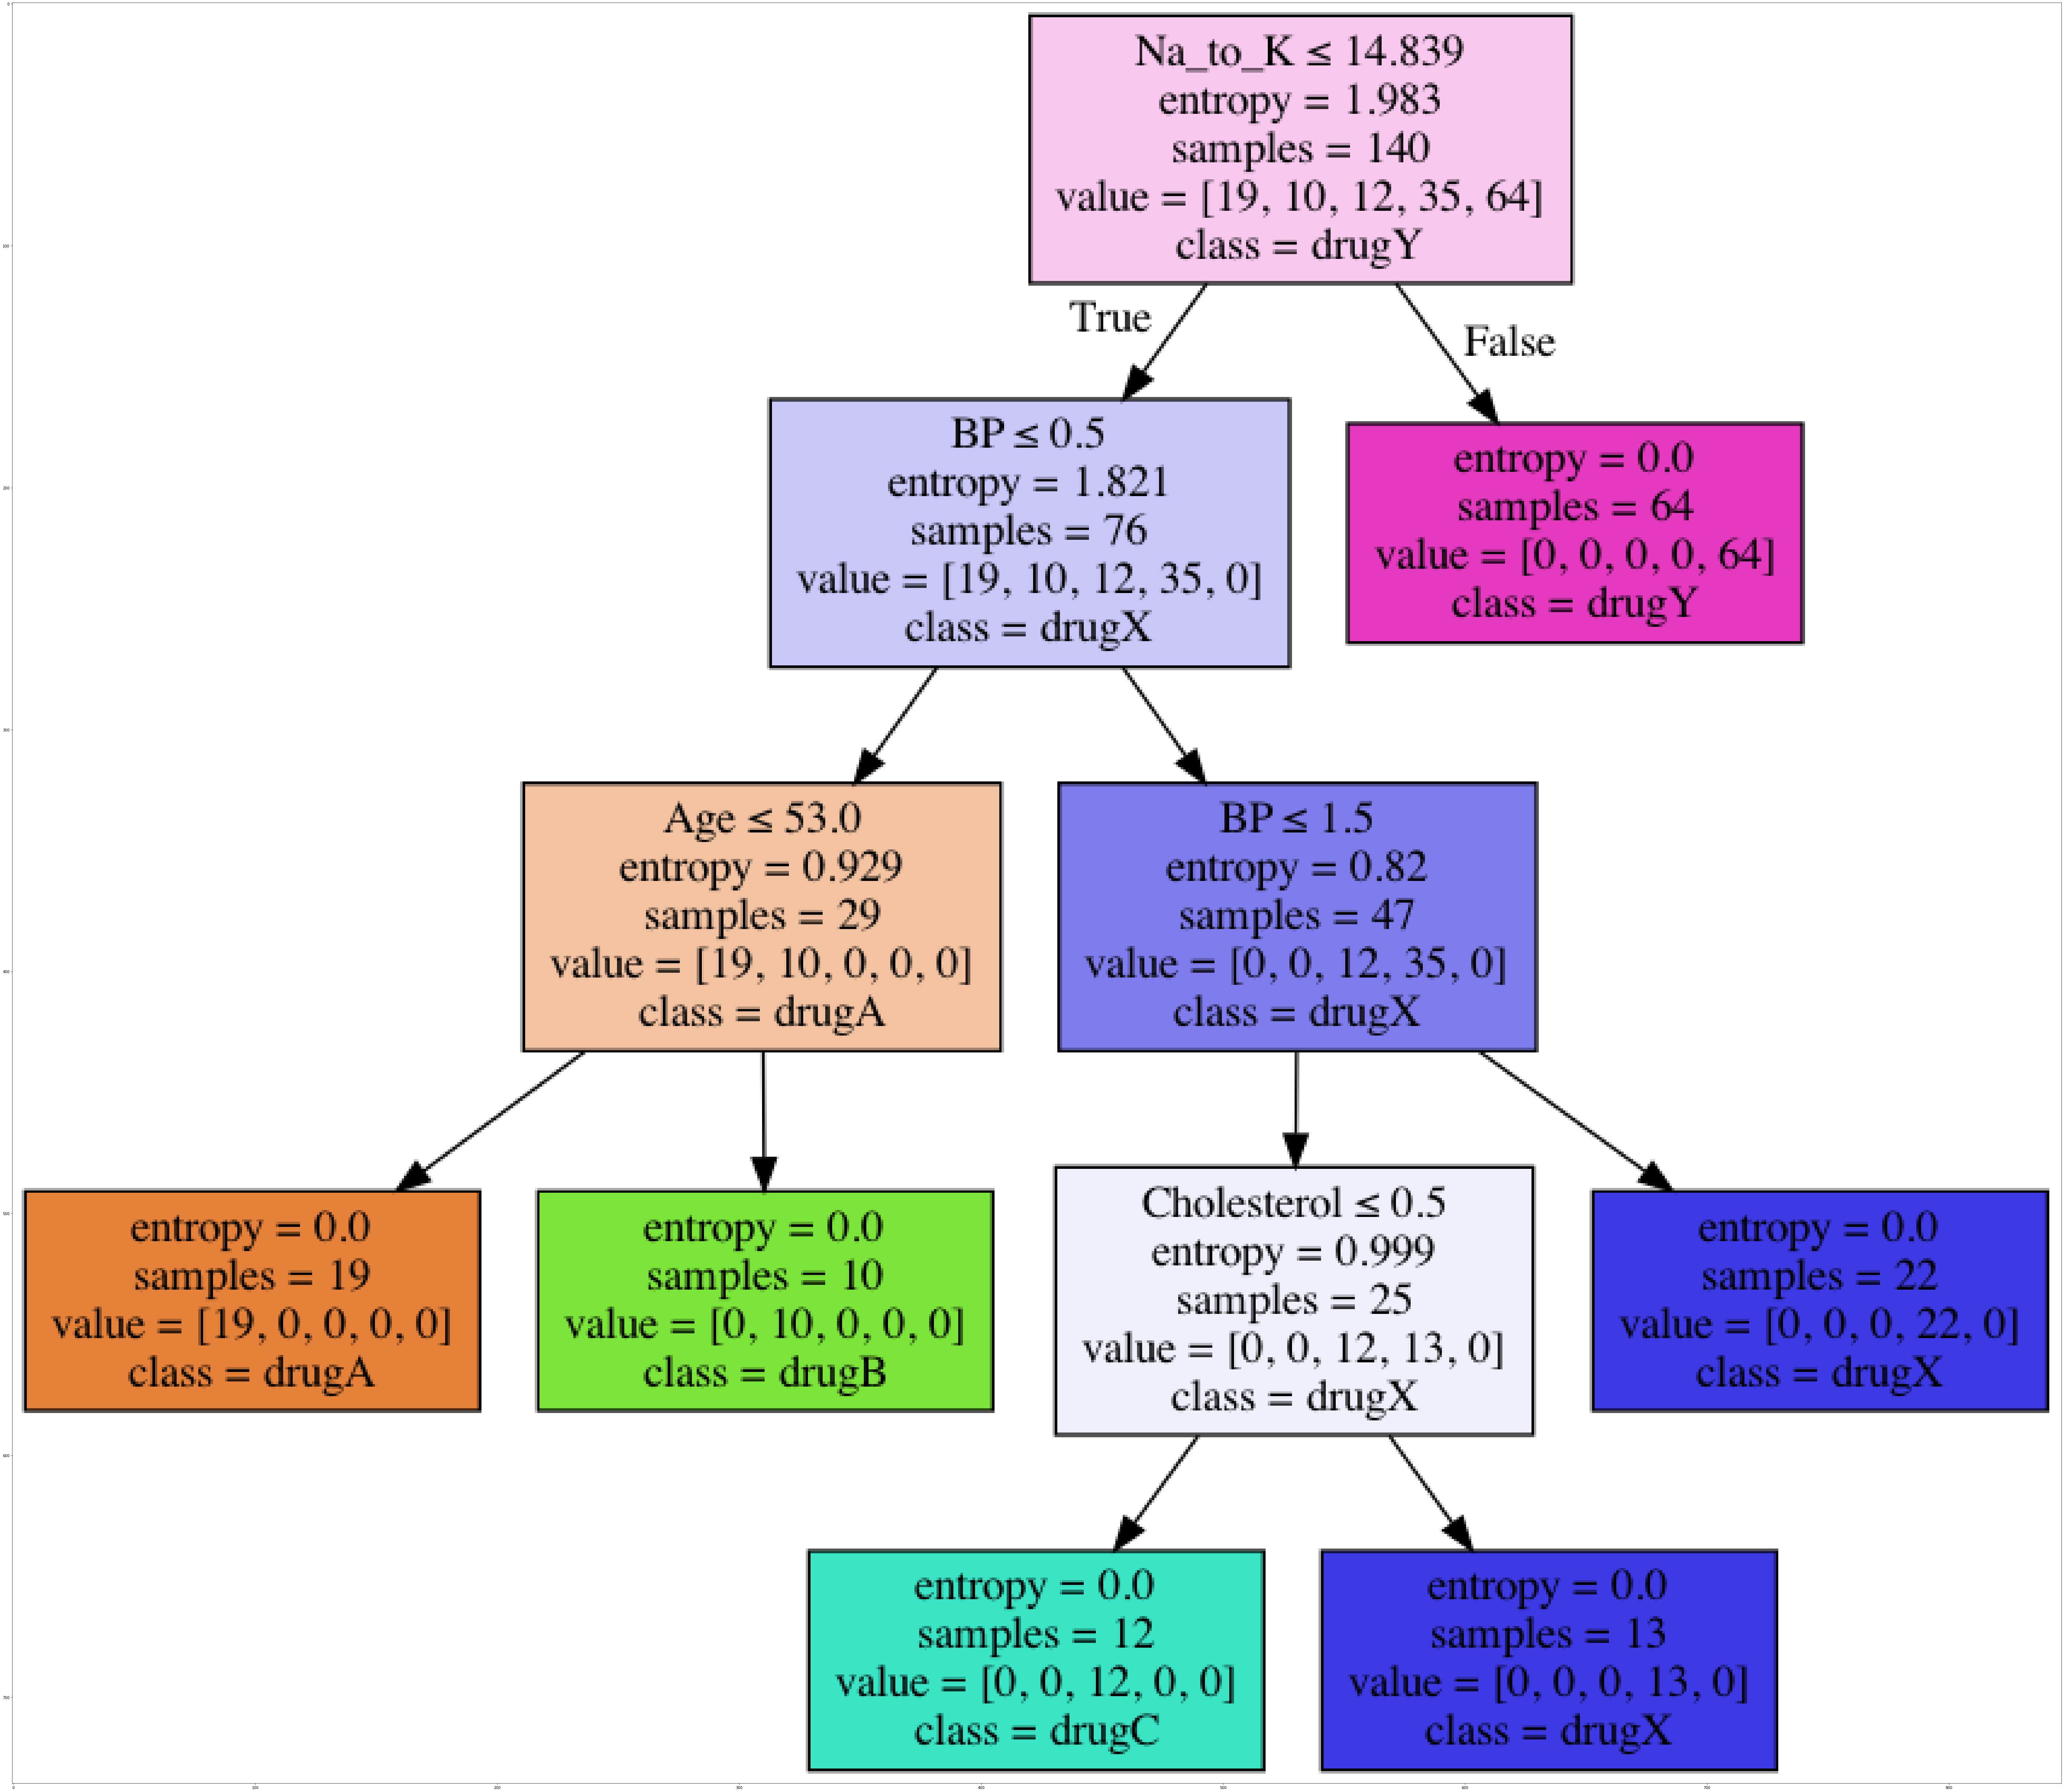

In [8]:
dot_data = StringIO()
filename = "drugtree.png"
featureNames = df.columns[0:5]
targetNames = df["Drug"].unique().tolist()
out=tree.export_graphviz(drugTree,feature_names=featureNames, out_file=dot_data, class_names= np.unique(y_train), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')

## Conclusion


Not quite sure how the decision tree is working... need to spend a considerable amount of time trying to understand the function and the different attributes that it has.

Further, not sure why the sketch isn't working...
This seesm very 'easy' to apply, but I don't understand any of the science behind it...
How does Decision Tree from sklearn work?